# JANE STREET MARKET PREDICTION

# I. Tổng quan đề tài

## 1. Tổng quan

"Mua đáy, bán đỉnh" nghe thì có vẻ đơn giản, nhưng trong thực tế việc thu được lợi nhuận từ giao dịch chứng khoán là một bài toán vô cùng khó giải. 

Dưới lý thuyết thị trường hoàn hảo, giá cả các sản phẩm chứng khoán sẽ luôn ở trạng thái cân bằng và thật khó để thu được lợi nhuận từ việc chênh lệch giá. Thế nhưng trong thực tế, việc bất đối xứng thông tin giữa các cá thể tham gia giao dịch đã tạo nên sự không hoàn hảo của thị trường.

Dưới sự phát triển của giao dịch điện tử cùng hàng ngàn sản phẩm chứng khoán khác nhau, việc giao dịch trong một thị trường không hoàn hảo tạo ra vô số cơ hội arbitrage trong thời gian thực, thế nhưng những cơ hội ấy chỉ tồn tại trong vài phần trăm giây ngắn ngủi.

Bởi vậy, việc có thể xây dựng một chiến lược và mô hình giao dịch nhằm khai thác cơ hội kiếm lời từ giao dịch điện tử vừa là thách thức và đồng thời cũng là một cơ hội đầy tham vọng.

Với những kiến thức đã được tích lũy từ môn Học Máy của Đại học FUNiX, đề tài này sẽ cố gắng xây dựng một mô hình nhằm đưa ra quyết định đầu tư phù hợp cho những giao dịch trong tương lai dựa vào dữ liệu từ quá khứ và hiện tại. 



## 2. Mô tả dữ liệu

Bộ dữ liệu được lấy từ cuộc thi Jane Street Market Prediction.

Bộ dữ liệu gồm 130 features ẩn danh liên quan đến dữ liệu chứng khoán thực tế. Mỗi dòng trong bộ dữ liệu đại diện cho một cơ hội đầu tư, với tổng cộng là hơn 2 triệu dòng tương ứng với hơn 2 triệu cơ hội đầu tư phân bố trong 500 ngày.

Mỗi cơ hội đầu tư đều đi kèm với một thuộc tính Trọng số (weight) và Lợi suất (resp), mà khi kết hợp với nhau sẽ đại diện cho lợi nhuận của cơ hội đó.

Bên cạnh đó, cột Date thể hiện ngày mà cơ hội đầu tư diễn ra, trong khi cột ts_id thể hiện thứ tự của cơ hội.

Biến phụ thuộc của tập dữ liệu sẽ là cột Action, với 2 nhãn:
* **1: Chấp nhận cơ hội đầu tư với resp > 0**
* **0: Bỏ qua cơ hội đầu tư với resp <= 0**

# II. Mục tiêu đề tài

Đề tài này sẽ sử dụng những dữ liệu từ quá khứ, kết hợp với các phương pháp, thuật toán khác nhau để xây dựng một mô hình tối ưu trong việc ra quyết định đầu tư trong tương lai.

Bởi mỗi cơ hội được dự đoán hành động tương ứng là chấp nhận (1) hoặc từ chối (0) nên đề tài sẽ tiếp cận vấn đề theo hướng bài toán phân loại.

# III. Phương pháp đánh giá

Độ hiệu quả của đề tài được đánh giá dựa trên thước đo là Utility Score.

Mỗi dòng trong tập Test đại diện cho một cơ hội đầu tư, mà tại đó mô hình sẽ quyết định hành động thực hiện đầu tư (giá trị 1) hoặc bỏ qua (giá trị 0).

Mỗi cơ hội đầu tư (trade j) sẽ gắn liền với một trọng số (weight j) và lợi suất (resp j):


$$
p_i = \sum_j(weight_{ij} * resp_{ij} * action_{ij}),
$$

$$
t = \frac{\sum p_i }{\sqrt{\sum p_i^2}} * \sqrt{\frac{250}{|i|}},
$$

trong đó $ |i| $ là tổng số ngày dương lịch thuộc tập Test. Khi đó ta có công thức tính Utility Score:

$$ u = min(max(t,0), 6) \sum p_i. $$

Thước đo này giúp đánh giá mức độ lợi nhuận mà mô hình có thể đạt được thông qua việc dự đoán cơ hội đầu tư là có lãi. Vì nguồn lực của mỗi thành phần trong nền kinh tế là có hạn nên việc dự đoán và chọn lọc cơ hội đầu tư một cách hiệu quả đóng vai trò vô cùng quan trọng để giảm thiểu chi phí đi kèm. 

Một điều đặc biệt là công thức tính thành phần ***t*** ở trên rất giống với công thức tính chỉ số Sharpe Ratio (nếu loại bỏ thừa số $ \sqrt{250} $). Đây là một chỉ số được phát triển bởi một nhà kinh tế được giải thưởng Nobel, William F.Sharpe nhằm mục đích đo lường tỷ suất sinh lợi đã điều chỉnh rủi ro của một khoản đầu tư.

Đối với các Hedge Fund, Sharpe Ratio >= 3.0 là mức chấp nhận được, và tổng lợi suất tích lũy khoảng 8% trong 70 ngày (số ngày của tập Test) là ổn định, thì **Utility Score = 400**  được coi là base score.



# IV. Phân tích và xử lý dữ liệu

## 1. Phân tích dữ liệu

In [ ]:
# this data is already excluded day <= 85
data = pd.read_parquet('../input/janestreet/data.parquet')
data.head()


,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,86,0.859516,-0.003656,-0.005449,-0.017403,-0.028896,-0.021435,1,3.151305,5.467693,-0.164505,-0.189219,0.663966,0.988896,NaN,NaN,2.184804,3.278742,NaN,NaN,1.471544,2.391430,1.640887,3.938759,NaN,NaN,2.361346,4.711640,NaN,NaN,1.958027,4.069699,2.535238,4.813858,NaN,NaN,-0.194392,-0.336857,NaN,NaN,-0.073242,-0.131142,-0.197839,-0.288336,0.341815,0.599994,-0.202268,-0.471068,-0.405654,0.052440,-1.349263,-0.633717,-0.796947,-0.381209,-0.542896,-0.166690,0.222588,-0.554461,-0.187021,-0.551972,2.589171,4.141244,NaN,-0.414845,-1.150279,-0.908903,-1.341168,-1.325681,-1.110222,-1.656347,-1.810199,-4.434427,-1.661965,-1.101438,-2.136155,-2.048593,2.649794,3.595955,4.039769,NaN,-1.254960,NaN,-0.763423,-1.204365,0.649855,NaN,-0.374423,NaN,-0.335769,-0.345847,0.386626,NaN,-1.238212,NaN,-2.321156,-1.641860,-2.060506,NaN,-1.515613,NaN,-1.746285,-1.086886,-3.388070,NaN,1.607253,NaN,0.199793,0.969663,-2.434601,NaN,0.227364,NaN,-0.633981,-0.122468,-4.349793,NaN,0.322244,NaN,-0.458309,-0.032740,-3.018269,NaN,-1.219454,NaN,-2.608786,-1.611309,-2.724954,NaN,NaN,2.433699,4.282284,1.621115,4.331030,2.553220,3.799011,2.642943,3.998054,527894
1,86,0.000000,-0.009107,-0.013542,-0.022222,-0.032522,-0.026394,1,2.249176,2.618401,-0.304355,-0.276975,-0.035921,-0.036215,NaN,NaN,3.354857,3.040463,NaN,NaN,2.365050,2.376956,2.337125,3.438553,NaN,NaN,3.041641,4.165903,NaN,NaN,2.889146,4.174374,3.234317,4.276899,NaN,NaN,-1.644735,-2.479335,NaN,NaN,-1.321317,-1.491122,-2.478752,-2.496164,0.396227,0.435508,-0.248213,-0.439213,-0.993568,3.075146,0.017041,-1.907786,-1.643755,-0.873190,-0.730260,-0.627203,-0.498971,-2.203055,-1.725478,-2.086345,2.184227,-0.152785,NaN,-0.687010,-1.775500,-1.508644,-1.546806,-1.248566,-1.045781,-1.892714,-2.131570,-4.407797,-1.720470,-1.133543,-2.126616,-2.039426,3.591019,1.079669,3.550142,NaN,-1.871530,NaN,-1.154754,-1.803521,-0.008046,NaN,-0.198914,NaN,-0.167805,-0.182515,0.164888,NaN,-1.238212,NaN,-2.321156,-1.641860,-2.579694,NaN,-1.515613,NaN,-1.746285,-1.086886,-4.781603,NaN,2.557578,NaN,0.665543,1.704761,-1.965635,NaN,-0.079505,NaN,-0.857492,-0.512759,-4.546557,NaN,1.275872,NaN,-0.054892,0.872509,-3.120828,NaN,-1.881751,NaN,-3.280218,-2.261787,-3.617442,NaN,NaN,2.053416,-0.493276,1.661974,-1.082122,2.427706,-0.756115,2.210572,-0.639075,527895
2,86,0.590949,0.000347,-0.000376,-0.004051,-0.007995,-0.004743,-1,-0.365888,0.824004,-0.293208,-0.416391,-0.599185,-0.997330,NaN,NaN,-0.869330,0.174646,NaN,NaN,-2.376733,-2.602154,-0.580833,0.145479,NaN,NaN,-0.440224

Có một sự khác biệt khá rõ về dữ liệu trước ngày 86 so với phần còn lại. Điều này sẽ được minh họa bằng một số đồ thị dưới đây.

Đầu tiên ta sẽ biểu diễn đồ thị lợi nhuận (pi) theo ngày (date). Như đã trình bày ở phần Phương pháp đánh giá, lợi nhuận (pi) được tính theo công thức:

$$
p_i = \sum_j(weight_{ij} * resp_{ij} * action_{ij}),
$$



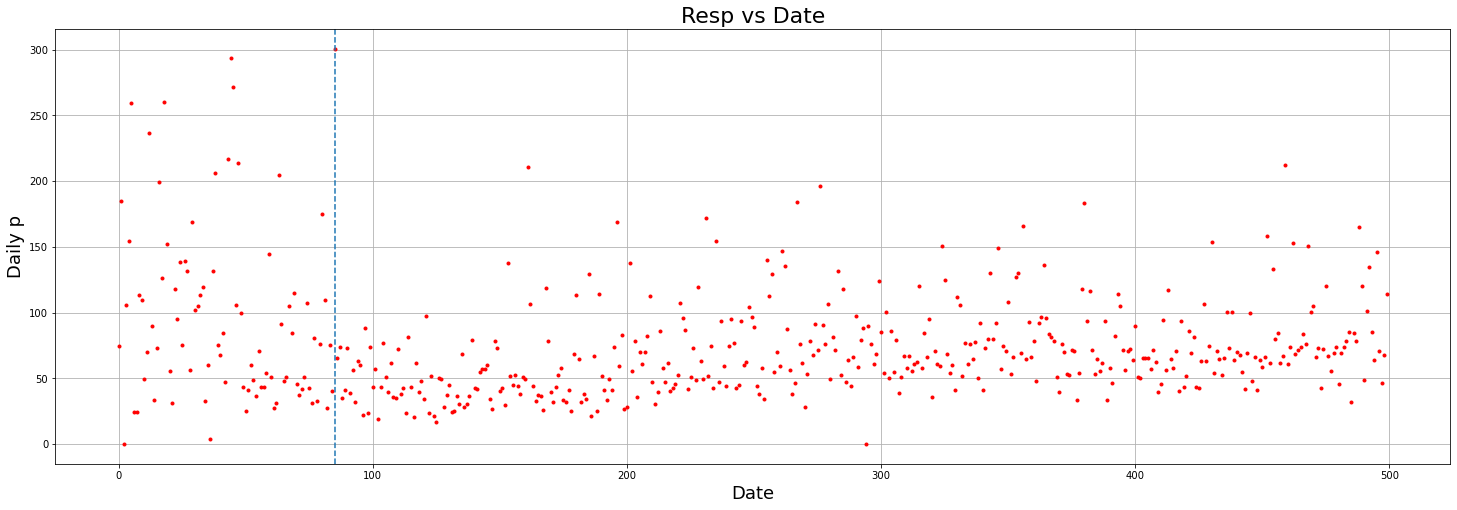

Có thể dễ dàng thấy rằng lợi nhuận từ ngày 85 (nét đứt xanh) trở về trước dao động phân tán hơn rất nhiều so với phần còn lại.

Tiếp theo, ta sẽ biểu diễn đồ thị thể hiện số lượng cơ hội giao dịch (số lượng ts_id) theo ngày.

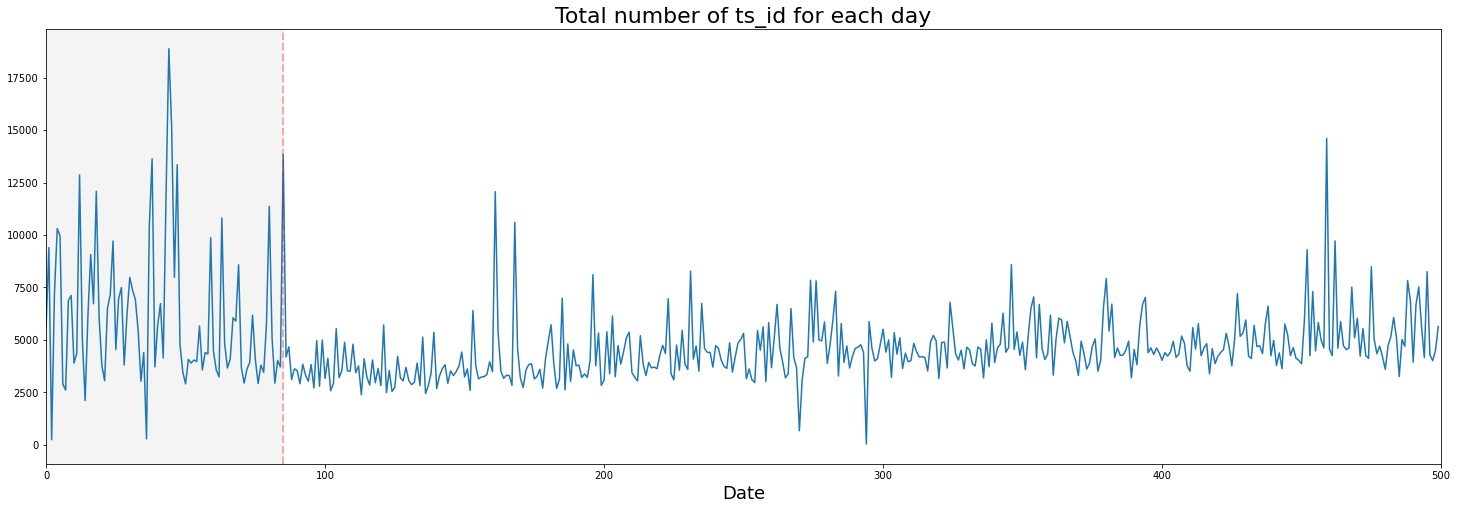

Để làm rõ hơn nữa, hãy quan sát phân phối của số lượng cơ hội giao dịch theo ngày.

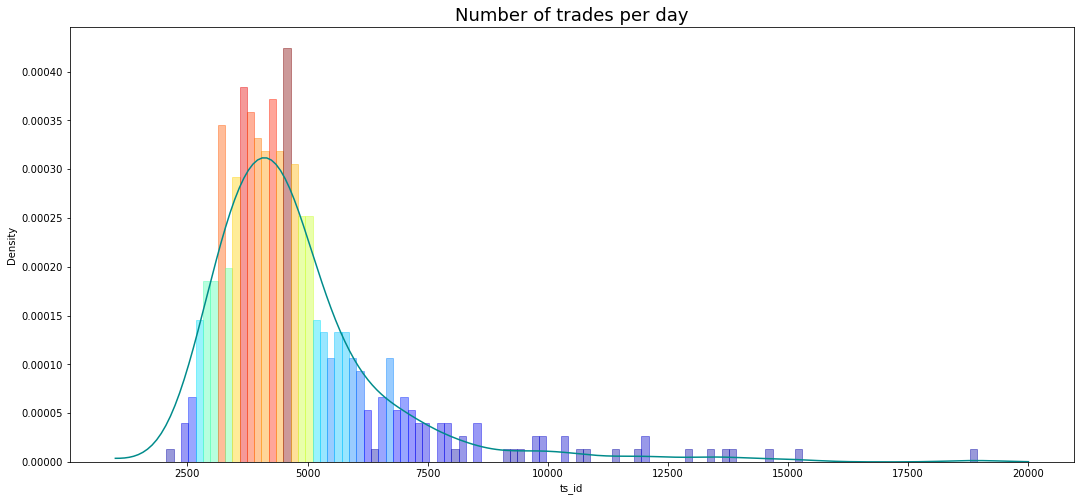

Nếu coi những ngày có tần suất hơn 9000 cơ hội giao dịch diễn ra là ngày mà thị trường "biến động mạnh", ta có danh sách những ngày "biến động mạnh" như sau:

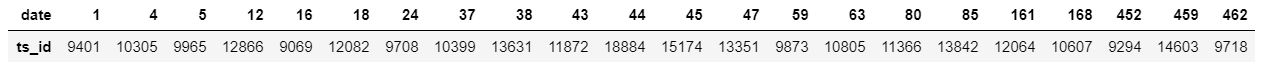

Ta thấy phần lớn những ngày biến động mạnh đều phân bố trước ngày 86. Qua những quan sát ở trên, có thể suy đoán rằng vào ngày thứ 85, thị trường đã có một sự thay đổi bất ngờ (có thể liên quan đến chính sách, sự kiện nào đó). Điều này có tác động ảnh hưởng lên xu hướng của thị trường, khiến cho việc giao dịch không còn sôi nổi như trước.
Như vậy để giúp cho mô hình hoạt động tốt hơn, dữ liệu từ ngày 85 trở về trước sẽ được loại bỏ.

## 2. Sàng lọc dữ liệu

Tập dữ liệu bao gồm cả những cơ hội giao dịch có trọng số (weight) = 0. Quan sát thấy những giao dịch này chiếm khoảng 15.6% dữ liệu. Vì dữ liệu có trọng số = 0 không đóng góp cho việc tính toán Utility Score, ta sẽ tiến hành loại bỏ.

Ngoài ra, ta cũng tiến hành biến đổi kiểu dữ liệu cho các giá trị np.float64 thành dạng np.float32. Điều này giúp cho dung lượng ghi nhớ dữ liệu giảm đi một nửa, tạo điều kiện có thêm bộ nhớ phục vụ việc huấn luyện mô hình.

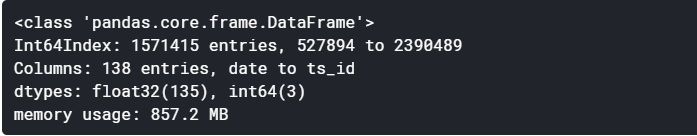

Tiếp đến, ta sẽ kiểm tra các thuộc tính bị mất dữ liệu.

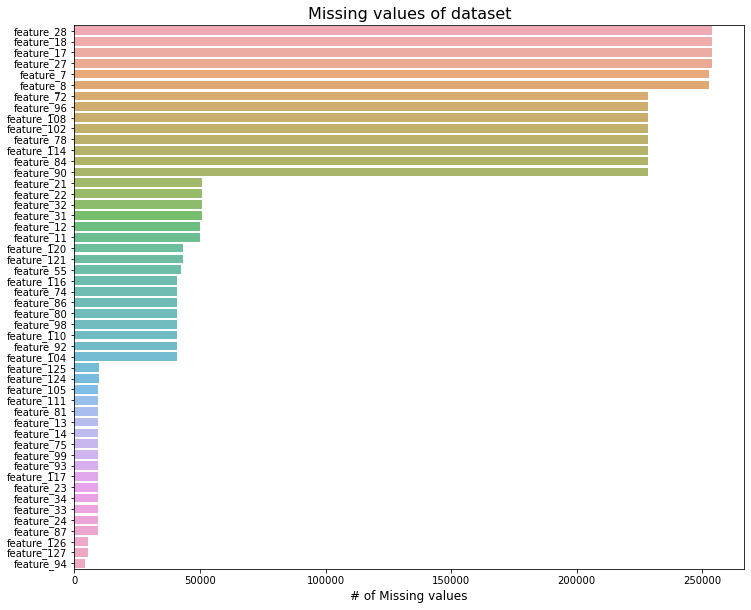

Lượng dữ liệu bị mất khá lớn. Ta sẽ tiến hành bù đắp dữ liệu mất mát bằng giá trị Trung bình (Mean) của mỗi thuộc tính.

## 3. Tính cân bằng của nhãn

Nhãn (biến phụ thuộc) của dữ liệu gồm 2 giá trị 0 và 1, tương ứng với bỏ qua hoặc chấp nhận cơ hội đầu tư.

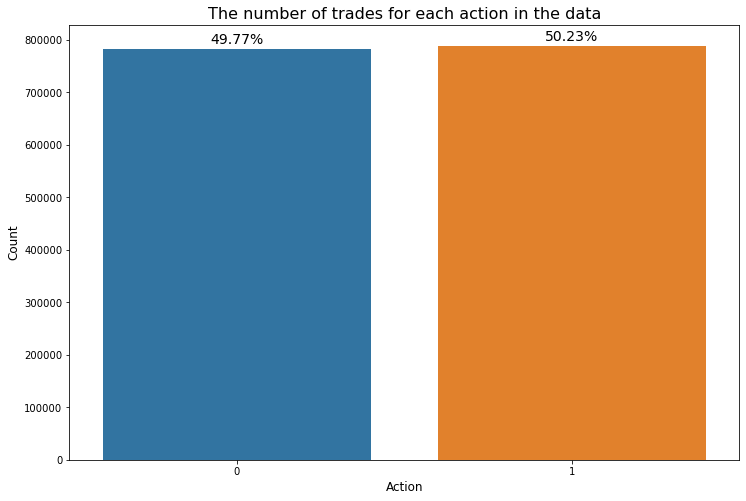

**Ta thấy rằng nhãn của dữ liệu phân bố khá cân bằng.**

## 4. Phân tích sự tương quan và chiều dữ liệu

Biểu diễn đồ thị thể hiện sự tương quan giữa các thuộc tính

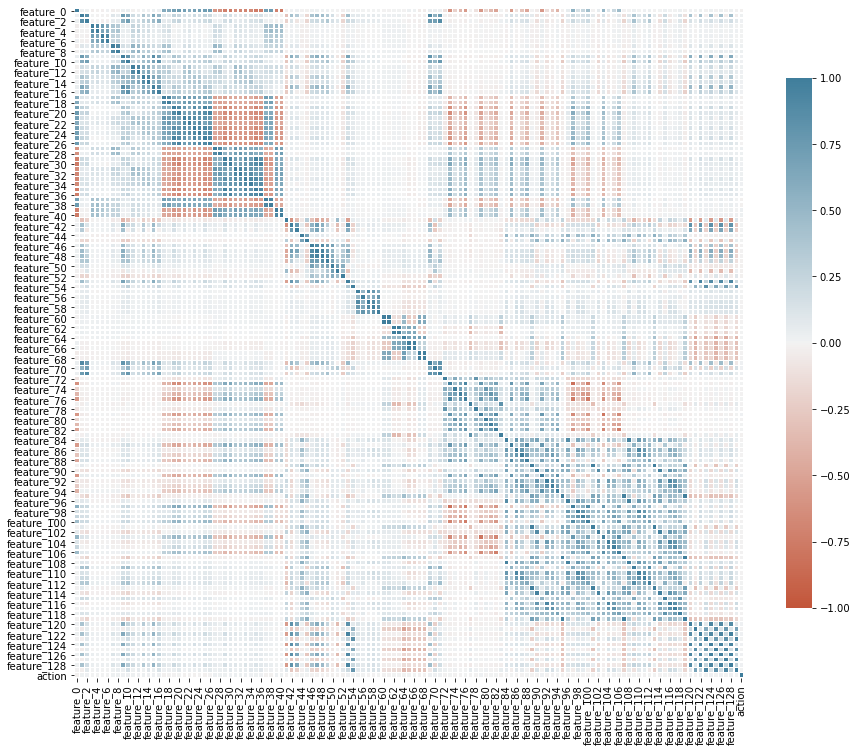

Ta thấy có một số ít các thuộc tính thể hiện sự tương quan với nhau.


Tiếp theo ta sẽ thực hiện giảm chiều dữ liệu thông qua Principal component analysis (Phép phân tích thành phần chính). Dưới đây là đồ thị thể hiện mức độ giải thích sự biến thiên dữ liệu thông qua các thành phần chính:


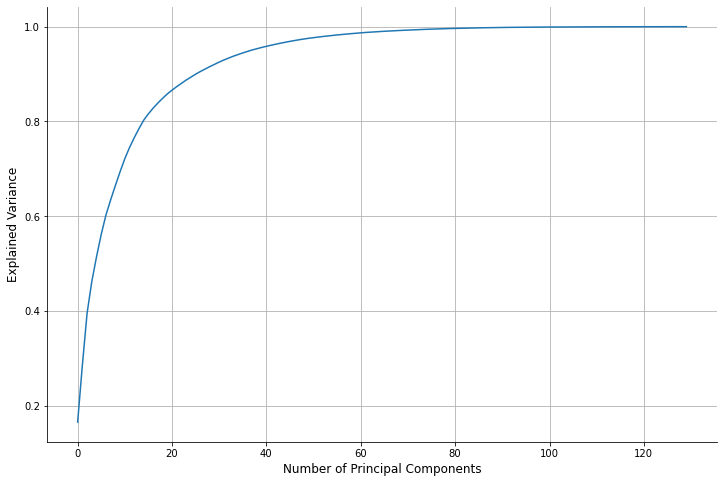

Quan sát thấy:
* 15 thành phần chính đầu tiên giải thích được khoảng 80% sự biến thiên của dữ liệu
* 40 thành phần chính đầu tiên giải thích được khoảng 95% sự biến thiên của dữ liệu

# V. Triển khai thuật toán

Dữ liệu sẽ được chia tách theo tỉ lệ 80-20 cho tập train và test. Đối với tập validation, đề tài này không thực hiện cross-validation mà tiếp tục chia tách từ tập train để đảm bảo tính phù hợp với dữ liệu chứng khoán theo dòng thời gian.

Đề tài này sẽ sử dụng các mô hình sau:
* Logistic Regression
* XGBoost
* LSTM
* Neural Network


## 1. Logistic Regression

Với mô hình này, ta thực hiện huấn luyên với đầy đủ thuộc tính.
Dữ liệu được chuẩn hóa trước khi huấn luyện. Ngoài ra, ta sử dụng thư viện GridSearchCV để tinh chỉnh các thông số sau:
* **'solver': {'newton-cg', 'lbfgs', 'sag'}**
* **'C': {0.1,1, 10}**

**Thông số tối ưu được lựa chọn như sau:**

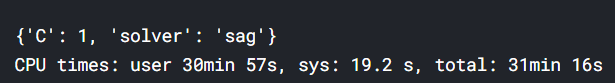

**Dưới đây là kết quả của mô hình trên tập Test:**

Classification report:

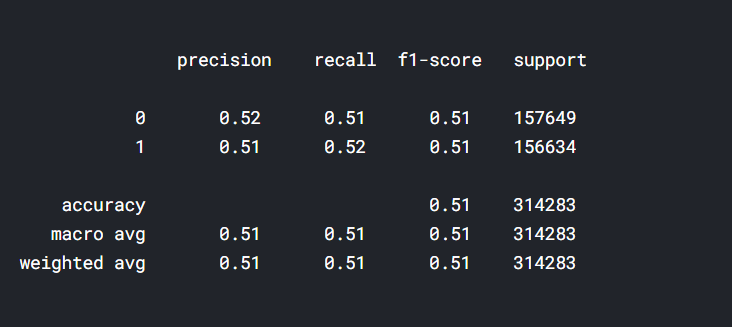

AUC score:

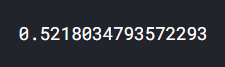

Utility score:

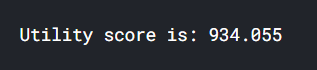

Utility score đã cao hơn base score nhưng vẫn chưa lí tưởng. Có thể thấy mô hình còn đơn giản, chưa phát hiện được nhiều cơ hội đầu tư sinh lời.

## 2. XGBoost


Ta sẽ huấn luận mô hình với XGBoost. Đây là thuật toán khá hiệu quả và tối ưu, dựa trên ý tưởng kết hợp các weak learners dưới dạng cây quyết định.

Với mô hình này, ta sử dụng thư viện Optuna để tinh chỉnh các thông số dưới đây:

* **'n_estimators': [200, 600]**
* **'max_depth': [10, 25]**
* **'learning_rate': [0.01, 0.1]**
* **'subsample': [0.50, 1]**
* **'colsample_bytree': [0.50, 1]**
* **'gamma': [0, 10]**

Ta cũng thực hiện việc huấn luyện mô hình với 2 trường hợp:
* **Huấn luyện với đầy đủ thuộc tính:**


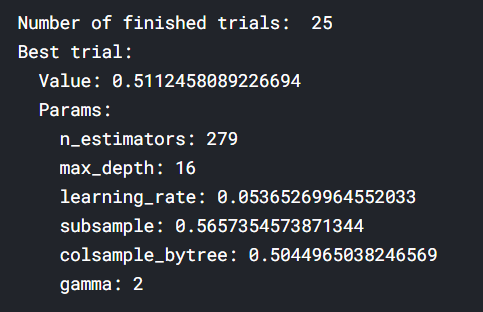




* **Huấn luyện với 50 thành phần chính từ phân tích PCA:**

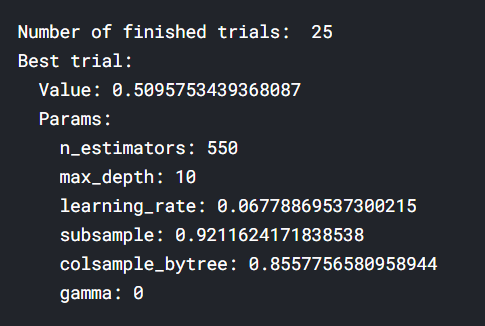








**Dưới đây là kết quả của mô hình trên tập test**:

|Classifer | Utility score |
| --- |  --- |
| XGB | 1133.846 | 
| PCA + XGB | 1447.022 | 

Có thể thấy, việc giảm chiều dữ liệu đã cải thiện đáng kể hiệu năng của mô hình XGBoost.

## 3. LSTM (Long Short-Term Memory)

Vì đầu ra của bài toán chỉ gồm 2 giá trị 0 và 1, việc sử dụng LSTM có thể không tối ưu như các bài toán với đầu ra là giá trị chuỗi thời gian. Tuy vậy vẫn rất đáng để thử bởi bản chất các thuộc tính của dữ liệu là giá trị được thu thập theo thời gian thực.

Ta sẽ thực hiện huấn luyện mô hình với 2 trường hợp:
* **Huấn luyện với đầy đủ thuộc tính**
* **Huấn luyện với 50 thành phần chính từ phân tích PCA**

Với mỗi trường hợp, ta sẽ thay đổi time-step của LSTM từ 1-5 (không thể thử thêm vì giới hạn phần cứng, thiết bị). Ngoài ra, các thông số khác được cài đặt như sau:
* **batch_size = 4096**
* **learning_rate = 1e-4**

Mạng có cấu trúc như sau:

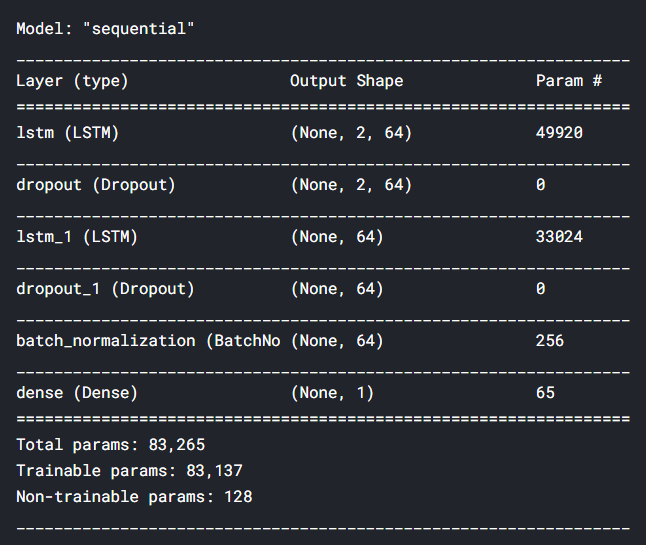

**Dưới đây là kết quả:**

|Classifer | Utility score |
| --- |  --- |
| LSTM (timestep 1) | 2719.112 | 
| LSTM (timestep 2) | 2861.313 |
| LSTM (timestep 3) | 2703.515 | 
| LSTM (timestep 4) | 2394.566 | 
| LSTM (timestep 5) | 2391.531 |
| PCA + LSTM (timestep 1) | 2371.856 | 
| PCA + LSTM (timestep 2) | 2437.729 |
| PCA + LSTM (timestep 3) | 2246.011 | 
| PCA + LSTM (timestep 4) | 2155.490 | 
| PCA + LSTM (timestep 5) | 2126.884 |

Ta thấy rằng việc giữ nguyên các thuộc tính của dữ liệu đem lại hiệu quả huấn luyện tốt hơn. 

Kết quả tốt nhất được ghi nhận tại timestep = 2 với Utility score = 2861.313. Kết quả này tốt hơn rất nhiều so với mô hình trước.

## 4. Neural Network

Tiếp theo ta sẽ cố gắng xây dựng một mạng Neural Network phức tạp hơn. 

Ta cũng thực hiện việc huấn luyện mô hình với 2 trường hợp:
* **Huấn luyện với đầy đủ thuộc tính**
* **Huấn luyện với 50 thành phần chính từ phân tích PCA**

Mạng có cấu trúc như sau:

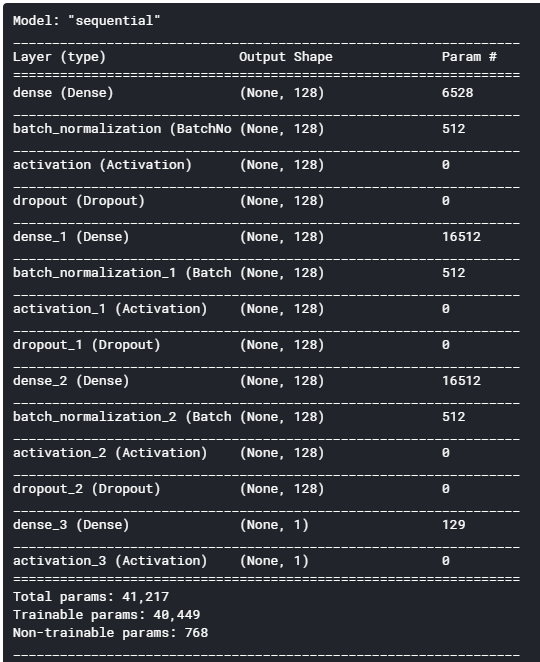

Ta thêm vào các Batch Normalization nhằm đảm bảo dữ liệu được chuẩn hóa trước khi đi qua lớp Activation. Điều này giúp cho việc tối ưu hàm mục tiêu trở nên ổn định, nhanh chóng hơn.

Các lớp Dropout được thêm vào nhằm làm giảm độ phức tạp, hạn chế việc overfit của mô hình.

**Ta thu được kết quả trên tập Test như sau:**

|Classifer | Utility score |
| --- |  --- |
| Neural Network | 2280.958 | 
| PCA + Neural Network | 2040.143 | 

Một lần nữa, ta thấy rằng việc giữ nguyên các thuộc tính của dữ liệu đem lại hiệu quả huấn luyện tốt hơn. Kết quả tốt nhất được ghi nhận với Utility score = 2280.958

# VI. Tổng hợp kết quả:



Kết quả được tổng hợp theo bảng dưới đây:

|Classifer | Utility score |
| --- |  --- |
| Logistic Regression |  934.055 |
| XGBoost | 1133.846 | 
| PCA + XGBoost | 1447.022 | 
| LSTM (timestep 1) | 2719.112 | 
| LSTM (timestep 2) | 2861.313 |
| LSTM (timestep 3) | 2703.515 | 
| LSTM (timestep 4) | 2394.566 | 
| LSTM (timestep 5) | 2391.531 |
| PCA + LSTM (timestep 1) | 2371.856 | 
| PCA + LSTM (timestep 2) | 2437.729 |
| PCA + LSTM (timestep 3) | 2246.011 | 
| PCA + LSTM (timestep 4) | 2155.490 | 
| PCA + LSTM (timestep 5) | 2126.884 |
| Neural Network | 2280.958 | 
| PCA + Neural Network | 2040.143 | 

# VII. Cải tiến hiệu năng:

Ta sẽ tiến hành kết hợp 2 mô hình với hiệu năng tốt nhất:

* **LSTM với timestep = 2, huấn luyện trên toàn bộ thuộc tính**
* **Neural Network huấn luyện trên toàn bộ thuộc tính**

Việc kết hợp mô hình dựa trên cơ chế "soft-voting", lấy trung bình kết quả dự đoán xác suất nhãn 1 của mỗi mô hình thành phần, ta thu được kết quả như sau:

|Classifer | Utility score |
| --- |  --- |
| LSTM (timestep 2) + Neural Network | 2897.839 | 

**Kết quả từ việc kết hợp mô hình đem lại hiệu năng tốt hơn một chút so với tất cả mô hình đơn lẻ. Kết quả đạt được với Utility score = 2897.839**

# VIII. Đánh giá đề tài:

Đề tài đã sử dụng những thuật toán, mô hình tối ưu, phù hợp với phần cứng và thiết bị sẵn có để đem lại kết quả khả quan.

Trong quá trình xây dựng mô hình, với nỗ lực cải thiện hiệu năng, một số kĩ thuật đã được thử nghiệm và sử dụng, trong đó có Tỉnh chỉnh thông số, Giảm chiều dữ liệu, Kết hợp mô hình...

Do còn nhiều hạn chế về mặt kiến thức và tài nguyên sẵn có, đề tài chắc chắn chưa thể đạt được kết quả và hiệu năng tối nhất. Bằng việc nghiên cứu những thuật toán cao cấp, cộng thêm với nguồn lực tối ưu, đề tải còn rất nhiều dư địa để phát triển, cải tiến hơn nữa trong tương lai. 